<a href="https://colab.research.google.com/github/VivoSorhie/seoul-bike-demand-forecasting/blob/main/seoul_bike_demand_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Install the library required to read Excel files
!pip install openpyxl

# Import pandas and the files module from google.colab
import pandas as pd
from google.colab import files

# Prompt you to upload a file
print("Please upload your SeoulBikeData.xlsx file:")
uploaded = files.upload()


Please upload your SeoulBikeData.xlsx file:


Saving SeoulBikeData.csv to SeoulBikeData.csv


In [3]:
df = pd.read_csv('SeoulBikeData.csv', encoding='latin1')

# Display the first 5 rows
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [5]:
# Rename the columns for easier access
df.columns = [
    'date', 'rented_bike_count', 'hour', 'temperature_c', 'humidity_percent',
    'wind_speed_ms', 'visibility_10m', 'dew_point_temp_c', 'solar_radiation_mj_m2',
    'rainfall_mm', 'snowfall_cm', 'seasons', 'holiday', 'functioning_day'
]

# Display the first 2 rows to confirm the new column names
df.head(2)

,date,rented_bike_count,hour,temperature_c,humidity_percent,wind_speed_ms,visibility_10m,dew_point_temp_c,solar_radiation_mj_m2,rainfall_mm,snowfall_cm,seasons,holiday,functioning_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
# Convert the 'date' column from an object (string) to a datetime object
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# Verify the change by checking the DataFrame's info again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   8760 non-null   datetime64[ns]
 1   rented_bike_count      8760 non-null   int64         
 2   hour                   8760 non-null   int64         
 3   temperature_c          8760 non-null   float64       
 4   humidity_percent       8760 non-null   int64         
 5   wind_speed_ms          8760 non-null   float64       
 6   visibility_10m         8760 non-null   int64         
 7   dew_point_temp_c       8760 non-null   float64       
 8   solar_radiation_mj_m2  8760 non-null   float64       
 9   rainfall_mm            8760 non-null   float64       
 10  snowfall_cm            8760 non-null   float64       
 11  seasons                8760 non-null   object        
 12  holiday                8760 non-null   object        
 13  fun

In [7]:
# Extract year, month, day, and day of the week from the 'date' column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.day_name()

# Display the first 5 rows to see our new columns
df.head()

,date,rented_bike_count,hour,temperature_c,humidity_percent,wind_speed_ms,visibility_10m,dew_point_temp_c,solar_radiation_mj_m2,rainfall_mm,snowfall_cm,seasons,holiday,functioning_day,year,month,day,day_of_week
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday


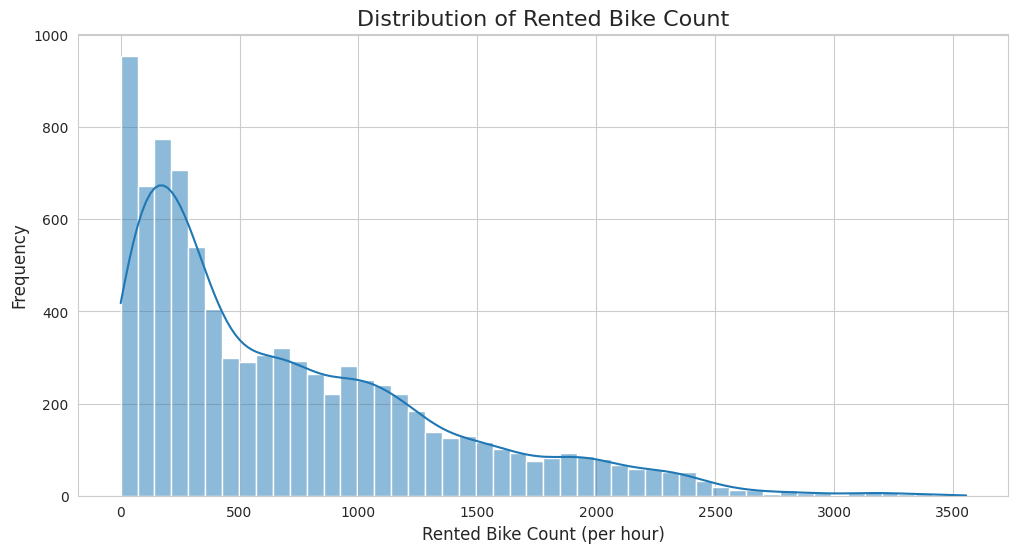

In [8]:
# Set the visual style for our plots
sns.set_style('whitegrid')

# Create a histogram to see the distribution of the target variable
plt.figure(figsize=(12, 6))
sns.histplot(df['rented_bike_count'], kde=True, bins=50)
plt.title('Distribution of Rented Bike Count', fontsize=16)
plt.xlabel('Rented Bike Count (per hour)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

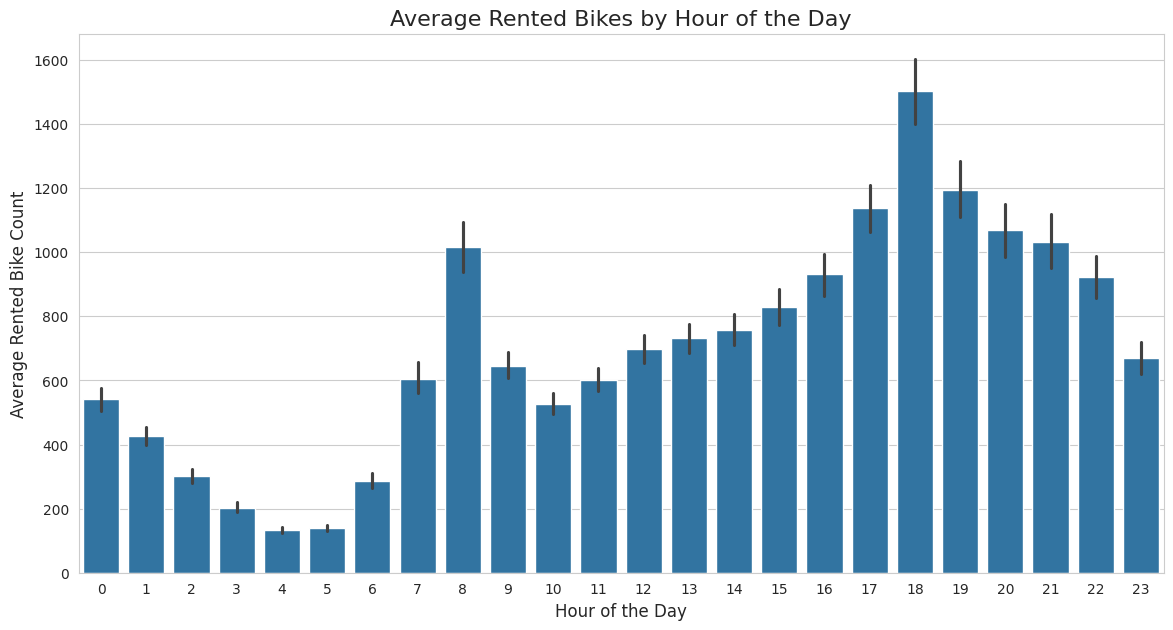

In [9]:
# Bivariate Analysis: Average bike rentals per hour
plt.figure(figsize=(14, 7))
sns.barplot(x='hour', y='rented_bike_count', data=df)

plt.title('Average Rented Bikes by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Rented Bike Count', fontsize=12)
plt.show()

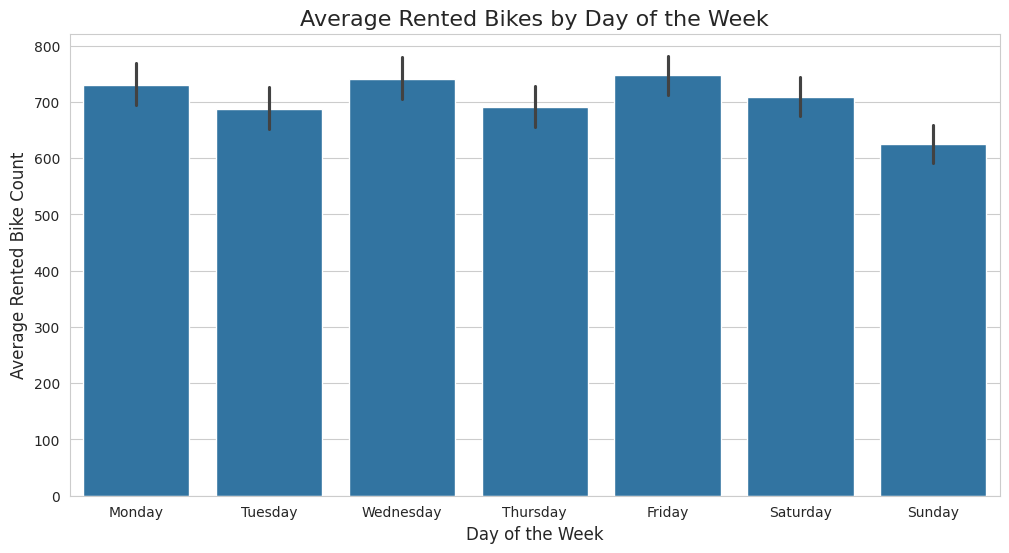

In [10]:
# Bivariate Analysis: Average bike rentals by day of the week
plt.figure(figsize=(12, 6))
# We specify the order to make sure the days are plotted chronologically
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x='day_of_week', y='rented_bike_count', data=df, order=day_order)

plt.title('Average Rented Bikes by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Rented Bike Count', fontsize=12)
plt.show()

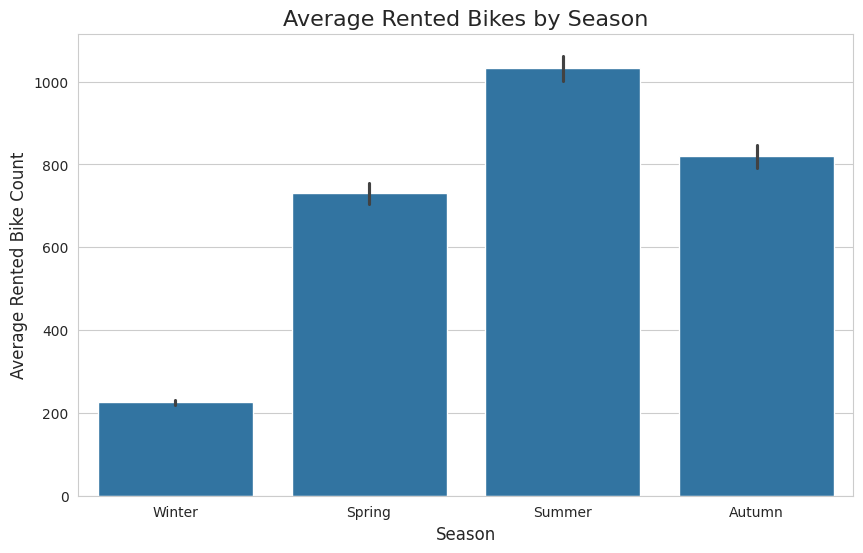

In [11]:
# Bivariate Analysis: Average bike rentals by season
plt.figure(figsize=(10, 6))
sns.barplot(x='seasons', y='rented_bike_count', data=df)

plt.title('Average Rented Bikes by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Rented Bike Count', fontsize=12)
plt.show()

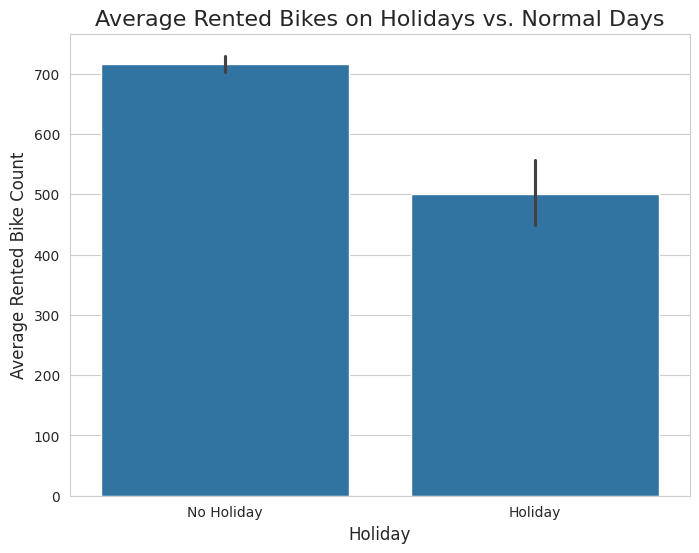

In [12]:
# Bivariate Analysis: Average bike rentals on holidays vs. normal days
plt.figure(figsize=(8, 6))
sns.barplot(x='holiday', y='rented_bike_count', data=df)

plt.title('Average Rented Bikes on Holidays vs. Normal Days', fontsize=16)
plt.xlabel('Holiday', fontsize=12)
plt.ylabel('Average Rented Bike Count', fontsize=12)
plt.show()

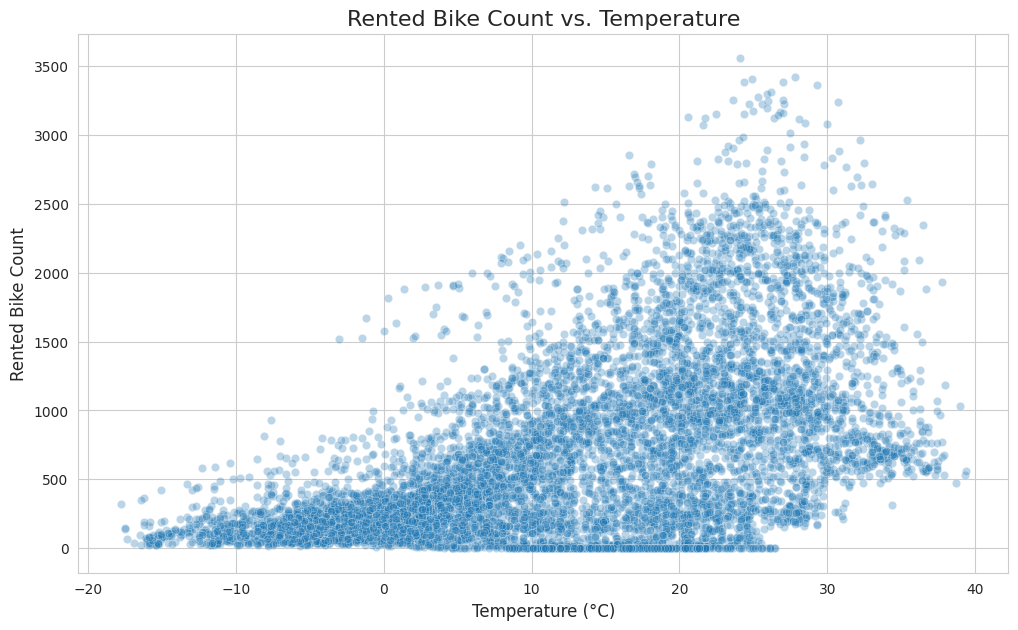

In [13]:
# Bivariate Analysis: Scatter plot for Temperature vs. Rented Bike Count
plt.figure(figsize=(12, 7))
# We use alpha=0.3 to make the points semi-transparent to see density
sns.scatterplot(x='temperature_c', y='rented_bike_count', data=df, alpha=0.3)

plt.title('Rented Bike Count vs. Temperature', fontsize=16)
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Rented Bike Count', fontsize=12)
plt.show()

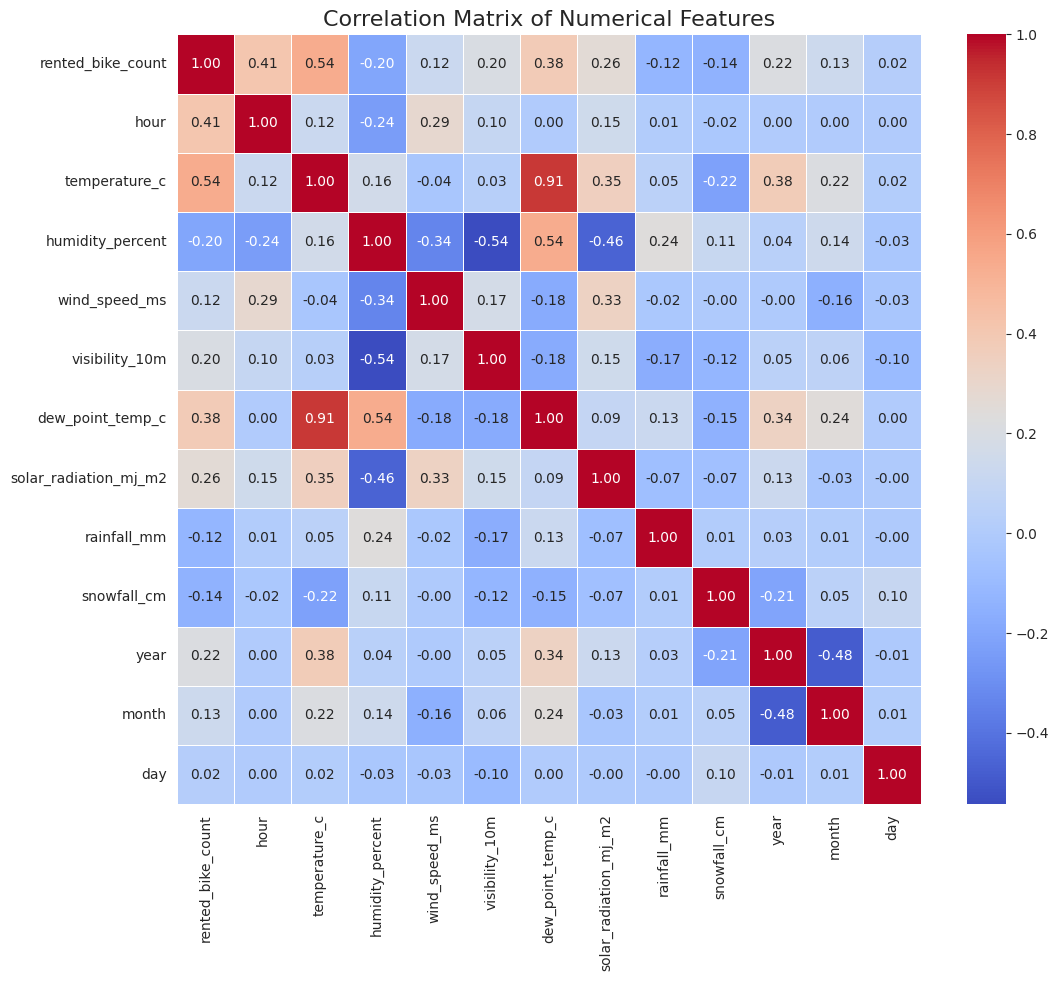

In [14]:
# Create a correlation matrix of the numerical columns
# We use numeric_only=True to ignore non-numeric columns
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

Handling categorical data using one hot encoding

In [15]:
# Convert categorical variables into dummy/indicator variables
# drop_first=True is used to avoid redundancy
df_processed = pd.get_dummies(df, columns=['seasons', 'holiday', 'functioning_day', 'day_of_week'], drop_first=True)

# The original 'date' column is no longer needed as we have extracted its features
df_processed = df_processed.drop('date', axis=1)

# Display the first 5 rows to see the new numerical columns
df_processed.head()


,rented_bike_count,hour,temperature_c,humidity_percent,wind_speed_ms,visibility_10m,dew_point_temp_c,solar_radiation_mj_m2,rainfall_mm,snowfall_cm,...,seasons_Summer,seasons_Winter,holiday_No Holiday,functioning_day_Yes,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,False,True,True,True,False,False,False,False,False,False
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,False,True,True,True,False,False,False,False,False,False
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,False,True,True,True,False,False,False,False,False,False
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,False,True,True,True,False,False,False,False,False,False
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,False,True,True,True,False,False,False,False,False,False


In [16]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target (y)
# X is everything except our target variable
X = df_processed.drop('rented_bike_count', axis=1)
# y is just the target variable
y = df_processed['rented_bike_count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the new dataframes to confirm the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (7008, 23)
Shape of X_test: (1752, 23)
Shape of y_train: (7008,)
Shape of y_test: (1752,)


In [17]:
from sklearn.ensemble import RandomForestRegressor

# 1. Initialize the model
# n_estimators=100 means we'll use 100 decision trees.
# random_state=42 ensures we get the same result every time we run it.
# n_jobs=-1 tells the model to use all available CPU cores to speed up training.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# 2. Train the model on the training data
print("Training the Random Forest model... (This may take a moment)")
rf_model.fit(X_train, y_train)
print("Training complete!")

# 3. Make predictions on the test data
y_pred = rf_model.predict(X_test)

# To see how our model did, let's compare the first 10 predictions to the actual values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nComparison of Actual vs. Predicted values:")
results_df.head(10)

Training the Random Forest model... (This may take a moment)
Training complete!

Comparison of Actual vs. Predicted values:


,Actual,Predicted
6056,1728,1767.10
5556,822,727.91
5990,658,672.08
7674,2716,2178.85
3319,1083,713.20
5761,636,763.29
5972,1537,1636.04
8758,712,745.97
6079,425,697.31
7177,594,444.21


In [18]:
from sklearn import metrics
import numpy as np

# Calculate the evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

print("Model Evaluation Results:")
print("---------------------------")
print(f"Mean Absolute Error (MAE): {mae:.2f} bikes")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} bikes")
print(f"R-squared (R²): {r2:.2f}")

Model Evaluation Results:
---------------------------
Mean Absolute Error (MAE): 103.49 bikes
Root Mean Squared Error (RMSE): 180.41 bikes
R-squared (R²): 0.92


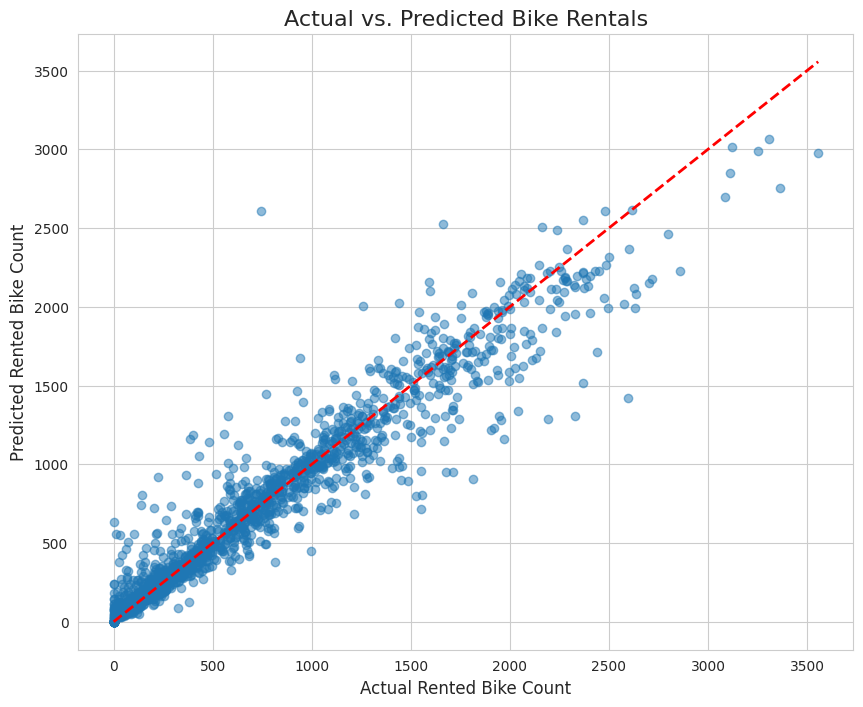

In [19]:
# Visualize the predictions vs. actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
# Add a line for perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)

plt.title('Actual vs. Predicted Bike Rentals', fontsize=16)
plt.xlabel('Actual Rented Bike Count', fontsize=12)
plt.ylabel('Predicted Rented Bike Count', fontsize=12)
plt.show()